# Source of the tasks

The tasks was taken from: https://github.com/Exorust/TorchLeet/tree/main/torch/easy

The notebook includes the following tasks:
- Implement a CNN on CIFAR-10
- Implement an RNN from Scratch
- Use torchvision.transforms to apply data augmentation
- Add a benchmark to your PyTorch code
- Train an autoencoder for anomaly detection
- Quantize your language model
- Implement Mixed Precision Training using torch.cuda.amp

# Implement a CNN for CIFAR-10 in PyTorch

## Problem Statement
You are tasked with implementing a **Convolutional Neural Network** (CNN) for image classification on the **CIFAR-10** dataset using PyTorch. The model should contain convolutional layers for feature extraction, pooling layers for downsampling, and fully connected layers for classification. Your goal is to complete the CNN model by defining the necessary layers and implementing the forward pass.

### Requirements
1. **Define the CNN Model:**
   - Add **convolutional layers** for feature extraction.
   - Add **pooling layers** to reduce the spatial dimensions.
   - Add **fully connected layers** to output class predictions.
   - The model should be capable of processing input images of size (32x32x3) as in the CIFAR-10 dataset.

### Constraints
   - The CNN should be designed with multiple convolutional and pooling layers followed by fully connected layers.
   - Ensure the model is compatible with the CIFAR-10 dataset, which contains 10 classes.

**! Hint:** Add the convolutional (conv1, conv2), pooling (pool), and fully connected layers (fc1, fc2) in `CNNModel.__init__.`
Implement the forward pass to process inputs through these layers.

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
import torchvision
import torchvision.transforms as transforms

# Load CIFAR-10 dataset
transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))
])

train_dataset = torchvision.datasets.CIFAR10(root='./data', train=True, download=True, transform=transform)
train_loader = torch.utils.data.DataLoader(train_dataset, batch_size=64, shuffle=True)

test_dataset = torchvision.datasets.CIFAR10(root='./data', train=False, download=True, transform=transform)
test_loader = torch.utils.data.DataLoader(test_dataset, batch_size=64, shuffle=False)

# Define the CNN Model
# TODO: Add convolutional, pooling, and fully connected layers
class CNNModel(nn.Module):
    def __init__(self):
        ...

    def forward(self, x):
        ...

# Initialize the model, loss function, and optimizer
model = CNNModel()
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

# Training loop
epochs = 10
for epoch in range(epochs):
    for images, labels in train_loader:
        # Forward pass
        outputs = model(images)
        loss = criterion(outputs, labels)

        # Backward pass and optimization
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

    print(f"Epoch [{epoch + 1}/{epochs}], Loss: {loss.item():.4f}")


# Evaluate on the test set
correct = 0
total = 0
with torch.no_grad():
    for images, labels in test_loader:
        outputs = model(images)
        _, predicted = torch.max(outputs, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

print(f"Test Accuracy: {100 * correct / total:.2f}%")

## Solution

### Rephrase

Implement a CNN for image classification on the CIFAR-10 dataset (input images of size (32x32x3)), includes:
- convolutional layers for feature extraction.
- pooling layers to reduce the spatial dimensions.
- fully connected layers to output class predictions (finally contains 10 classes)

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
import torchvision
import torchvision.transforms as transforms

# Load CIFAR-10 dataset
transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))
])

train_dataset = torchvision.datasets.CIFAR10(root='./data', train=True, download=True, transform=transform)
train_loader = torch.utils.data.DataLoader(train_dataset, batch_size=64, shuffle=True)

test_dataset = torchvision.datasets.CIFAR10(root='./data', train=False, download=True, transform=transform)
test_loader = torch.utils.data.DataLoader(test_dataset, batch_size=64, shuffle=False)

# Define the CNN Model
# TODO: Add convolutional, pooling, and fully connected layers
class CNNModel(nn.Module):
    def __init__(self):
        super().__init__()
        self.network = nn.Sequential(
            # Convolutional blocks
            nn.Conv2d(in_channels=3, out_channels=32, kernel_size=3, padding=1), # 32x32x3
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2, stride=2), # 32x32 -> 16x16

            nn.Conv2d(in_channels=32, out_channels=64, kernel_size=3, padding=1), # 32x32x3
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2, stride=2), # 16x16 -> 8x8

            nn.Flatten(),

            # Fully connected layers
            nn.Linear(64 * 8 * 8, 512), # 64 channels × 8×8 spatial = 4096
            nn.ReLU(),
            nn.Linear(512, 10)
        )


    def forward(self, x):
        return self.network(x)

# Initialize the model, loss function, and optimizer
model = CNNModel()
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

# Training loop
epochs = 10
for epoch in range(epochs):
    for images, labels in train_loader:
        # Forward pass
        outputs = model(images)
        loss = criterion(outputs, labels)

        # Backward pass and optimization
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

    print(f"Epoch [{epoch + 1}/{epochs}], Loss: {loss.item():.4f}")


# Evaluate on the test set
correct = 0
total = 0
with torch.no_grad():
    for images, labels in test_loader:
        outputs = model(images)
        _, predicted = torch.max(outputs, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

print(f"Test Accuracy: {100 * correct / total:.2f}%")

100%|██████████| 170M/170M [00:02<00:00, 61.6MB/s]


Epoch [1/10], Loss: 0.9838
Epoch [2/10], Loss: 1.0752
Epoch [3/10], Loss: 0.9476
Epoch [4/10], Loss: 0.5390
Epoch [5/10], Loss: 0.3995
Epoch [6/10], Loss: 0.0665
Epoch [7/10], Loss: 0.2304
Epoch [8/10], Loss: 0.0195
Epoch [9/10], Loss: 0.1048
Epoch [10/10], Loss: 0.0183
Test Accuracy: 72.39%


After two convolutional layers with pooling, the 32x32 image is compressed to 8x8, with 64 channels. Before the fully connected layer, we flatten the tensor into a vector, yielding 64 x 8 x 8 = 4096 features. Therefore, the first Linear layer takes 4096 inputs and compresses them to 512. This 512 features than compresses to the 10 features represents 10 classes.



---



# Implement an RNN in PyTorch

## Problem Statement

You are tasked with implementing a **Recurrent Neural Network (RNN)** in PyTorch to process sequential data. The model should contain an RNN layer for handling sequential input and a fully connected layer to output the final predictions. Your goal is to complete the RNN model by defining the necessary layers and implementing the forward pass.

## Requirements
1. Define the **RNN Model**:
   - Add an RNN layer to process sequential data.
   - Add a fully connected layer to map the RNN output to the final prediction.

## Constraints
   - Use appropriate configurations for the RNN layer, including hidden units and input/output sizes.

**💡 Hint:**
   - Add the RNN layer (`self.rnn`) and fully connected layer (`self.fc`) in `RNNModel.__init__`.
   - Implement the forward pass to process inputs through the RNN layer and fully connected layer.

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim

# Generate synthetic sequential data
torch.manual_seed(42)
sequence_length = 10
num_samples = 100

# Create a sine wave dataset
X = torch.linspace(0, 4 * 3.14159, steps=num_samples).unsqueeze(1)
y = torch.sin(X)

# Prepare data for RNN
def create_in_out_sequences(data, seq_length):
    in_seq = []
    out_seq = []
    for i in range(len(data) - seq_length):
        in_seq.append(data[i:i + seq_length])
        out_seq.append(data[i + seq_length])
    return torch.stack(in_seq), torch.stack(out_seq)

X_seq, y_seq = create_in_out_sequences(y, sequence_length)

# Define the RNN Model
# TODO: Add RNN layer, fully connected layer, and forward implementation
class RNNModel(nn.Module):
    def __init__(self):
        ...

    def forward(self, x):
        ...

# Initialize the model, loss function, and optimizer
model = RNNModel()
criterion = nn.MSELoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

# Training loop
epochs = 500
for epoch in range(epochs):
    for sequences, labels in zip(X_seq, y_seq):
        sequences = sequences.unsqueeze(0)  # Add batch dimension
        labels = labels.unsqueeze(0)  # Add batch dimension

        # Forward pass
        outputs = model(sequences)
        loss = criterion(outputs, labels)

        # Backward pass and optimization
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

    print(f"Epoch [{epoch + 1}/{epochs}], Loss: {loss.item():.4f}")

# Testing on new data
X_test = torch.linspace(4 * 3.14159, 5 * 3.14159, steps=10).unsqueeze(1)

# Reshape to (batch_size, sequence_length, input_size)
X_test = X_test.unsqueeze(0)  # Add batch dimension, shape becomes (1, 10, 1)

with torch.no_grad():
    predictions = model(X_test)
    print(f"Predictions for new sequence: {predictions.tolist()}")

## Rephrase

Implement a RNN to process sequential data, includes:
- RNN layer to process sequential data (`self.rnn`).
- a fully connected layer to map the RNN output to the final prediction (`self.fc`)

💡 **Note (by the code):**
- the goal is predict the next value of the sine wave based on the last `sequence_length=10` points.
- **Input sequence**: `X_seq.shape = (90, 10, 1)`
  - 90 is the number of training examples (`100 - 10`),
  - 10 is the sequence length (`seq_length`),
  - 1 is the step size (scalar: `sin(t)`).
- **Target output**:
  - `y_seq.shape = (90, 1)` - one value per sequence -> **multi-input, single-output regression**.

## Code

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim

# Generate synthetic sequential data
torch.manual_seed(42)
sequence_length = 10
num_samples = 100

# Create a sine wave dataset
X = torch.linspace(0, 4 * 3.14159, steps=num_samples).unsqueeze(1)
y = torch.sin(X)

# Prepare data for RNN
def create_in_out_sequences(data, seq_length):
    in_seq = []
    out_seq = []
    for i in range(len(data) - seq_length):
        in_seq.append(data[i:i + seq_length])
        out_seq.append(data[i + seq_length])
    return torch.stack(in_seq), torch.stack(out_seq)

X_seq, y_seq = create_in_out_sequences(y, sequence_length)

# Define the RNN Model
# TODO: Add RNN layer, fully connected layer, and forward implementation
class RNNModel(nn.Module):
    def __init__(self):
      super().__init__()
      self.rnn = nn.RNN(
          input_size=1, # scalar
          hidden_size=32, # etc. 32 or 64
          num_layers=2,
          batch_first=True
      )
      self.fc = nn.Linear(32, 1)

    def forward(self, x):
      # x.shape: (batch_size, seq_len, input_size)
      rnn_out, hidden = self.rnn(x)

      # rnn_out.shape: (batch_size, seq_len, hidden_size)
      last_hidden = rnn_out[:, -1, :]  # (batch_size, hidden_size)
      output = self.fc(last_hidden)    # (batch_size, output_size)
      return output

In [ ]:
%%time

# Initialize the model, loss function, and optimizer
model = RNNModel()
criterion = nn.MSELoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

# Training loop
epochs = 500
for epoch in range(epochs):
    for sequences, labels in zip(X_seq, y_seq):
        sequences = sequences.unsqueeze(0)  # Add batch dimension
        labels = labels.unsqueeze(0)  # Add batch dimension

        # Forward pass
        outputs = model(sequences)
        loss = criterion(outputs, labels)

        # Backward pass and optimization
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

    print(f"Epoch [{epoch + 1}/{epochs}], Loss: {loss.item():.4f}")

# Testing on new data
X_test = torch.linspace(4 * 3.14159, 5 * 3.14159, steps=10).unsqueeze(1)

# Reshape to (batch_size, sequence_length, input_size)
X_test = X_test.unsqueeze(0)  # Add batch dimension, shape becomes (1, 10, 1)

with torch.no_grad():
    predictions = model(X_test)
    print(f"Predictions for new sequence: {predictions.tolist()}")

Epoch [1/500], Loss: 0.1966
Epoch [2/500], Loss: 0.0026
Epoch [3/500], Loss: 0.0578
Epoch [4/500], Loss: 0.0082
Epoch [5/500], Loss: 0.0082
Epoch [6/500], Loss: 0.0051
Epoch [7/500], Loss: 0.0000
Epoch [8/500], Loss: 0.1313
Epoch [9/500], Loss: 0.0272
Epoch [10/500], Loss: 0.0074
Epoch [11/500], Loss: 0.0008
Epoch [12/500], Loss: 0.0001
Epoch [13/500], Loss: 0.0002
Epoch [14/500], Loss: 0.0003
Epoch [15/500], Loss: 0.0000
Epoch [16/500], Loss: 0.0000
Epoch [17/500], Loss: 0.0013
Epoch [18/500], Loss: 0.0001
Epoch [19/500], Loss: 0.0000
Epoch [20/500], Loss: 0.0199
Epoch [21/500], Loss: 0.0149
Epoch [22/500], Loss: 0.0633
Epoch [23/500], Loss: 0.1555
Epoch [24/500], Loss: 0.0231
Epoch [25/500], Loss: 0.0324
Epoch [26/500], Loss: 0.0000
Epoch [27/500], Loss: 0.0001
Epoch [28/500], Loss: 0.0000
Epoch [29/500], Loss: 0.0000
Epoch [30/500], Loss: 0.0000
Epoch [31/500], Loss: 0.0000
Epoch [32/500], Loss: 0.0000
Epoch [33/500], Loss: 0.0000
Epoch [34/500], Loss: 0.0000
Epoch [35/500], Loss: 0

### Implementation Notes

I noted that the templa code used SGD - we could expected high dispersion of gradients. We expected a slow convergence due to the fact that the Loss jumped.The error in one example may be small, in another - large.

Since my dataset is small (90 examples), I can train on the entire batch at once. This speeds up training, reduces gradient noise, and avoids updating the weights multiple times with the same gradient.

it would represent Full-Batch GD:
  - Calculate the loss for all 90 examples,
  - average the gradients across all examples,
  - update the weights based on the average direction

As a result:
  - The dependence is smooth and deterministic (sine) -> no need for "regularization via SGD noise."
  - The model is small (RNN with 2 layers) -> not prone to overfitting on this task.

In [ ]:
%%time

# Initialize the model, loss function, and optimizer
model = RNNModel()
criterion = nn.MSELoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

# Training loop
epochs = 500
for epoch in range(epochs):
    outputs = model(X_seq)
    loss = criterion(outputs, y_seq)
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    print(f"Epoch [{epoch + 1}/{epochs}], Loss: {loss.item():.4f}")

# Testing on new data
X_test = torch.linspace(4 * 3.14159, 5 * 3.14159, steps=10).unsqueeze(1)

# Reshape to (batch_size, sequence_length, input_size)
X_test = X_test.unsqueeze(0)  # Add batch dimension, shape becomes (1, 10, 1)

with torch.no_grad():
    predictions = model(X_test)
    print(f"Predictions for new sequence: {predictions.tolist()}")

Epoch [1/500], Loss: 0.4551
Epoch [2/500], Loss: 0.4282
Epoch [3/500], Loss: 0.4005
Epoch [4/500], Loss: 0.3717
Epoch [5/500], Loss: 0.3417
Epoch [6/500], Loss: 0.3106
Epoch [7/500], Loss: 0.2785
Epoch [8/500], Loss: 0.2458
Epoch [9/500], Loss: 0.2130
Epoch [10/500], Loss: 0.1811
Epoch [11/500], Loss: 0.1516
Epoch [12/500], Loss: 0.1263
Epoch [13/500], Loss: 0.1075
Epoch [14/500], Loss: 0.0969
Epoch [15/500], Loss: 0.0947
Epoch [16/500], Loss: 0.0982
Epoch [17/500], Loss: 0.1025
Epoch [18/500], Loss: 0.1035
Epoch [19/500], Loss: 0.0994
Epoch [20/500], Loss: 0.0905
Epoch [21/500], Loss: 0.0789
Epoch [22/500], Loss: 0.0670
Epoch [23/500], Loss: 0.0566
Epoch [24/500], Loss: 0.0488
Epoch [25/500], Loss: 0.0439
Epoch [26/500], Loss: 0.0414
Epoch [27/500], Loss: 0.0404
Epoch [28/500], Loss: 0.0399
Epoch [29/500], Loss: 0.0390
Epoch [30/500], Loss: 0.0371
Epoch [31/500], Loss: 0.0338
Epoch [32/500], Loss: 0.0294
Epoch [33/500], Loss: 0.0243
Epoch [34/500], Loss: 0.0191
Epoch [35/500], Loss: 0

# Use torchvision.transforms for Data Augmentation

## Problem Statement

You are tasked with applying data augmentation techniques to image data using `torchvision.transforms`. The goal is to enhance the variability of the input data by applying the following transformations:
  - **Random Horizontal Flip**: Flip the image horizontally with a probability of `0.5`.
  - **Random Crop**: Randomly crop the image to a specific size.
  - **Normalization**: Normalize the image using a specified mean and standard deviation.

Additionally, you will visualize a batch of augmented images to verify the transformations have been applied correctly.

## Requirements

1. **Apply Data Augmentation:**
  - Use torchvision.transforms to apply:
     - Random Horizontal Flip: Flip the image randomly with a probability of `0.5`.
     - Random Crop: Randomly crop the image to a size of `28x28`.
     - Normalization: Normalize the image with specified mean and standard deviation values.
2. **Verify Augmentation:**
   - Visualize a batch of augmented images using **matplotlib** to ensure the transformations are applied correctly.

## Constraints
   - Ensure the transformations are applied in the correct order.
   - Normalize the images using appropriate values for mean and standard deviation, such as those used in common datasets like CIFAR-10.

 ! Hint
   - Define the `transforms.Compose` pipeline: Include RandomHorizontalFlip, RandomCrop, and Normalize in the correct sequence.
   - Visualize the Augmentation: Use imshow to confirm that the transformations are applied correctly.

100%|██████████| 170M/170M [00:03<00:00, 50.1MB/s]


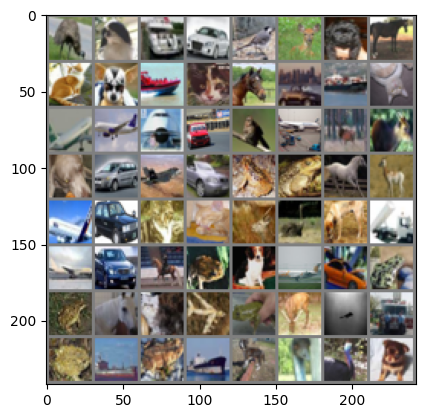

In [ ]:
import torch
import torchvision
import torchvision.transforms as transforms
import torch.utils.data as data
import matplotlib.pyplot as plt
import numpy as np

# Load CIFAR-10 dataset with data augmentation
# TODO: Apply random horizontal flip, random crop, and normalization to the images
transform = transforms.Compose([
    ...
])

train_dataset = torchvision.datasets.CIFAR10(root='./data', train=True, download=True, transform=transform)
train_loader = torch.utils.data.DataLoader(train_dataset, batch_size=64, shuffle=True)

test_dataset = torchvision.datasets.CIFAR10(root='./data', train=False, download=True, transform=transform)
test_loader = torch.utils.data.DataLoader(test_dataset, batch_size=64, shuffle=False)

# Display a batch of augmented images
def imshow(img):
    img = img / 2 + 0.5  # unnormalize
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))
    plt.show()

# Get some random training images
data_iter = iter(train_loader)
images, labels = next(data_iter)

# Show images
imshow(torchvision.utils.make_grid(images))

## Solution

### Rephrase

Applying data augmentatoins to image by `torchvision.transforms`:
  - Random Horizontal Flip with a probability of `0.5` (`RandomHorizontalFlip`)
  - Randomly crop the image to a specific size (`RandomCrop`)
  - Normalize the image using a specified mean and standard deviation (`Normalize`)
  
Visualize by `imshow` a batch of augmented images to verify the transformations have been applied correctly

### Code

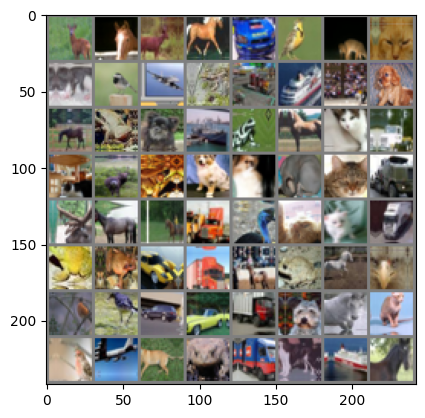

In [ ]:
import torch
import torchvision
import torchvision.transforms as transforms
import torch.utils.data as data
import matplotlib.pyplot as plt
import numpy as np

# Load CIFAR-10 dataset with data augmentation
# TODO: Apply random horizontal flip, random crop, and normalization to the images
mean = std = (0.5, 0.5, 0.5)

transform = transforms.Compose([
    transforms.RandomHorizontalFlip(p=0.5), # horizontal flip
    transforms.RandomCrop(28, padding=4, padding_mode='reflect'), # Randomly crop the image to a size of 28x28
    transforms.ToTensor(),  # ToTensor() must come before Normalize because Normalize works on tensors in the range [0, 1].
    transforms.Normalize(mean, std) # with specified mean and standard deviation values
])

train_dataset = torchvision.datasets.CIFAR10(root='./data', train=True, download=True, transform=transform)
train_loader = torch.utils.data.DataLoader(train_dataset, batch_size=64, shuffle=True)

test_dataset = torchvision.datasets.CIFAR10(root='./data', train=False, download=True, transform=transform)
test_loader = torch.utils.data.DataLoader(test_dataset, batch_size=64, shuffle=False)

# Display a batch of augmented images
def imshow(img):
    img = img / 2 + 0.5  # unnormalize
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))
    plt.show()

# Get some random training images
data_iter = iter(train_loader)
images, labels = next(data_iter)

# Show images
imshow(torchvision.utils.make_grid(images))

# Add a Benchmark to Your PyTorch Code

## Problem Statement

You are tasked with implementing a simple neural network model with fully connected layers and adding benchmarking functionality to measure and display the time taken for each epoch of training and testing. The goal is to evaluate the model's performance and record the time taken for both training and testing phases.

## Requirements

1. **Define a Neural Network Model**:
   - Implement a simple feedforward neural network using fully connected layers (nn.Linear).
   - The network should be suitable for classification tasks.

2. **Benchmark Training and Testing**:
   - Measure the time taken for each epoch during training and display the elapsed time.
   - Measure and display the time taken for the testing phase after each epoch.

## Constraints

   - The model should have at least two hidden layers with ReLU activations.
   - Use the appropriate loss function and optimizer for training the model.
   - Ensure that the benchmarking measures both the training and testing time accurately.

**💡 Hints:**
  - Define the SimpleNN class:
    - Add two fully connected layers
    - Apply a ReLU activation function to the first layer
  - Benchmark the Code
    - Measure and print training time for each epoch
    - Measure and print testing time along with accuracy

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
import torchvision
import torchvision.transforms as transforms
import time

# Load MNIST dataset
transform = transforms.Compose([transforms.ToTensor(), transforms.Normalize((0.5,), (0.5,))])

train_dataset = torchvision.datasets.MNIST(root='./data', train=True, download=True, transform=transform)
train_loader = torch.utils.data.DataLoader(train_dataset, batch_size=64, shuffle=True)

test_dataset = torchvision.datasets.MNIST(root='./data', train=False, download=True, transform=transform)
test_loader = torch.utils.data.DataLoader(test_dataset, batch_size=64, shuffle=False)

# Define a simple neural network model
# TODO: Add layers to the model
class SimpleNN(nn.Module):
    def __init__(self):
        ...

    def forward(self, x):
        ...

# Initialize the model, loss function, and optimizer
model = SimpleNN()
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(model.parameters(), lr=0.01)

# Training loop with benchmarking
epochs = 5
for epoch in range(epochs):
    start_time = time.time()  # Start time for training
    for images, labels in train_loader:
        # Forward pass
        outputs = model(images)
        loss = criterion(outputs, labels)

        # Backward pass and optimization
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

    end_time = time.time()  # End time for training
    training_time = end_time - start_time
    print(f"Epoch [{epoch + 1}/{epochs}], Loss: {loss.item():.4f}, Time: {training_time:.4f}s")

# Evaluate the model on the test set and benchmark the accuracy
correct = 0
total = 0
start_time = time.time()  # Start time for testing
with torch.no_grad():
    for images, labels in test_loader:
        outputs = model(images)
        _, predicted = torch.max(outputs, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

end_time = time.time()  # End time for testing
testing_time = end_time - start_time
accuracy = 100 * correct / total
print(f"Test Accuracy: {accuracy:.2f}%, Testing Time: {testing_time:.4f}s")

## Solution

### Rephrase

Define a NNM and bechmark Training and testing:
  - The model uses fully connected layers (nn.Linear)
  - The model should have at least two hidden layers with ReLU
  - The network should be suitable for classification tasks.
  - Measure and print training time for each epoch.
  - Measure and print testing time along with accuracy.




In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
import torchvision
import torchvision.transforms as transforms
import time

# Load MNIST dataset
transform = transforms.Compose([transforms.ToTensor(), transforms.Normalize((0.5,), (0.5,))])

train_dataset = torchvision.datasets.MNIST(root='./data', train=True, download=True, transform=transform)
train_loader = torch.utils.data.DataLoader(train_dataset, batch_size=64, shuffle=True)

test_dataset = torchvision.datasets.MNIST(root='./data', train=False, download=True, transform=transform)
test_loader = torch.utils.data.DataLoader(test_dataset, batch_size=64, shuffle=False)

# Define a simple neural network model
# TODO: Add layers to the model
class SimpleNN(nn.Module):
    def __init__(self):
      super().__init__()
      self.network = nn.Sequential(
          # images from DataLoader have shape (64, 1, 28, 28), while nn.Linear expects (64, 784)
          nn.Flatten(),  # ← (N, 1, 28, 28) → (N, 784)

          # at least two headen layers
          nn.Linear(28 * 28, 128),
          nn.ReLU(),


          nn.Linear(128, 64),
          nn.ReLU(),
          nn.Linear(64, 32),
          nn.ReLU(),

          # output layer
          nn.Linear(32, 10),
      )

    def forward(self, x):
        return self.network(x)

# Initialize the model, loss function, and optimizer
model = SimpleNN()
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(model.parameters(), lr=0.01)

# Training loop with benchmarking
epochs = 5
for epoch in range(epochs):
    start_time = time.time()  # Start time for training
    for images, labels in train_loader:
        # Forward pass
        outputs = model(images)
        loss = criterion(outputs, labels)

        # Backward pass and optimization
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

    end_time = time.time()  # End time for training
    training_time = end_time - start_time
    print(f"Epoch [{epoch + 1}/{epochs}], Loss: {loss.item():.4f}, Time: {training_time:.4f}s")

# Evaluate the model on the test set and benchmark the accuracy
correct = 0
total = 0
start_time = time.time()  # Start time for testing
with torch.no_grad():
    for images, labels in test_loader:
        outputs = model(images)
        _, predicted = torch.max(outputs, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

end_time = time.time()  # End time for testing
testing_time = end_time - start_time
accuracy = 100 * correct / total
print(f"Test Accuracy: {accuracy:.2f}%, Testing Time: {testing_time:.4f}s")

100%|██████████| 9.91M/9.91M [00:00<00:00, 36.8MB/s]
100%|██████████| 28.9k/28.9k [00:00<00:00, 1.01MB/s]
100%|██████████| 1.65M/1.65M [00:00<00:00, 7.55MB/s]
100%|██████████| 4.54k/4.54k [00:00<00:00, 11.3MB/s]


Epoch [1/5], Loss: 0.7471, Time: 12.3241s
Epoch [2/5], Loss: 0.2873, Time: 12.1275s
Epoch [3/5], Loss: 0.2947, Time: 12.7630s
Epoch [4/5], Loss: 0.2234, Time: 12.0734s
Epoch [5/5], Loss: 0.2026, Time: 12.5979s
Test Accuracy: 91.98%, Testing Time: 1.8015s


# Train an Autoencoder for Anomaly Detection

## Problem Statement

You are tasked with implementing an **autoencoder** model for anomaly detection. The model will be trained on the **MNIST dataset**, and anomalies will be detected based on the reconstruction error. The autoencoder consists of an encoder to compress the input and a decoder to reconstruct the image. The difference between the original image and the reconstructed image will be used to detect anomalies.

## Requirements

Implement the `DNNModel` class that satisfies the following criteria:
1. **Define the Autoencoder Architecture**:
    - **Encoder:**
       - Implement a series of convolutional layers followed by max-pooling layers.
       - The encoder should progressively reduce the spatial dimensions of the input image, capturing the most important features.
    - **Decoder:**
       - Implement a series of transposed convolutional layers (also known as deconvolutional layers) to upsample the compressed representation back to the original image size.
       - Use a **Sigmoid activation** function in the final layer to ensure that the output pixel values are between 0 and 1.
2. **Forward Pass:**
    - Implement the forward method where the input image is passed through the encoder to obtain a compressed representation, followed by passing it through the decoder to reconstruct the image.

## Constraints
- The autoencoder should work on the MNIST dataset, which consists of 28x28 grayscale images.
- Ensure that the output of the decoder matches the original image size.
- Use Sigmoid activation in the final layer to constrain the output pixel values between 0 and 1.


💡 Hint
  - Focus on the encoder to downsample the input and the decoder to upsample and reconstruct the image.

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
import torchvision
import torchvision.transforms as transforms
import numpy as np
import matplotlib.pyplot as plt


# Load MNIST dataset
transform = transforms.Compose([transforms.ToTensor(), transforms.Normalize((0.5,), (0.5,))])

train_dataset = torchvision.datasets.MNIST(root='./data', train=True, download=True, transform=transform)
train_loader = torch.utils.data.DataLoader(train_dataset, batch_size=64, shuffle=True)

test_dataset = torchvision.datasets.MNIST(root='./data', train=False, download=True, transform=transform)
test_loader = torch.utils.data.DataLoader(test_dataset, batch_size=64, shuffle=False)

# Define an Autoencoder model
# TODO: Implement the autoencoder architecture
class Autoencoder(nn.Module):
    def __init__(self):
        # init
        ...
        # Encoder
        self.encoder = ...
        # Decoder
        self.decoder = ...

    def forward(self, x):
        ...

# Initialize the model, loss function, and optimizer
model = Autoencoder()
criterion = nn.MSELoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

# Training loop
epochs = 10
for epoch in range(epochs):
    for images, _ in train_loader:
        # Forward pass
        reconstructed = model(images)
        loss = criterion(reconstructed, images)

        # Backward pass and optimization
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

    print(f"Epoch [{epoch + 1}/{epochs}], Loss: {loss.item():.4f}")

# Detect anomalies using reconstruction error
threshold = 0.1  # Define a threshold for anomaly detection
model.eval()
anomalies = []
with torch.no_grad():
    for images, _ in test_loader:
        reconstructed = model(images)
        loss = criterion(reconstructed, images)

        # If reconstruction error exceeds the threshold, mark it as an anomaly
        if loss.item() > threshold:
            anomalies.append(images)

# Visualize anomalies
if anomalies:
    # Select the first anomaly and remove the channel dimension for visualization
    anomaly_image = anomalies[0][0].squeeze()  # Remove the channel dimension (1)
    print(f"Anomaly image shape: {anomaly_image.shape}")  # Optional: Check the shape of the image
    plt.imshow(anomaly_image.cpu().numpy(), cmap='gray')  # Convert tensor to NumPy array for visualization
    plt.show()
else:
    print("No anomalies detected.")

## Solution

### Rephrase

Implement an autoencoder for anomaly detection (compare encoder for input and a decoder to reconstruction, difference between is used to anomalies detection.
  - Use MNIST dataset with the reconstruction errors
  - Encoder
     - Implement a series of convolutional layers followed by max-pooling layers.
     - Progressively reduce the spatial dimensions of the input image, capturing the most important features
  - Decoder
     - Implement a series of transposed convolutional layers (also known as deconvolutional layers) to upsample the compressed representation back to the original image size.
     - Use a Sigmoid activation function in the final layer to ensure that the output pixel values are between 0 and 1.
  - Implement the forward method where the input image is passed through the encoder to obtain a compressed representation, followed by passing it through the decoder to reconstruct the image.

**Note:**

Input: (batch_size, 1, 28, 28) - MNIST grayscale.

Output: (batch_size, 1, 28, 28) with pixels in [0, 1] -> Sigmoid at the end.

28 is not divisible by 2 exactly twice.

Epoch [1/10], Loss: 1.8951
Epoch [2/10], Loss: 1.9084
Epoch [3/10], Loss: 1.8837
Epoch [4/10], Loss: 1.8880
Epoch [5/10], Loss: 1.9041
Epoch [6/10], Loss: 1.8837
Epoch [7/10], Loss: 1.8928
Epoch [8/10], Loss: 1.9214
Epoch [9/10], Loss: 1.8797
Epoch [10/10], Loss: 1.8831
Anomaly image shape: torch.Size([28, 28])


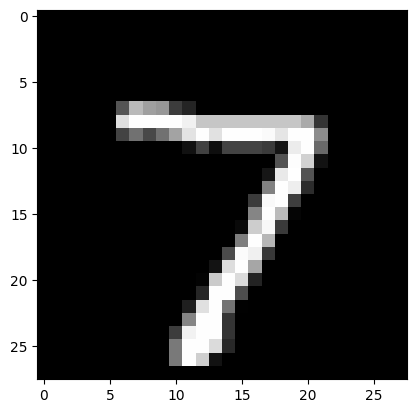

In [ ]:
from torch.nn.modules.pooling import MaxPool2d
import torch
import torch.nn as nn
import torch.optim as optim
import torchvision
import torchvision.transforms as transforms
import numpy as np
import matplotlib.pyplot as plt


# Load MNIST dataset
transform = transforms.Compose([transforms.ToTensor(), transforms.Normalize((0.5,), (0.5,))])

train_dataset = torchvision.datasets.MNIST(root='./data', train=True, download=True, transform=transform)
train_loader = torch.utils.data.DataLoader(train_dataset, batch_size=64, shuffle=True)

test_dataset = torchvision.datasets.MNIST(root='./data', train=False, download=True, transform=transform)
test_loader = torch.utils.data.DataLoader(test_dataset, batch_size=64, shuffle=False)

# Define an Autoencoder model
# TODO: Implement the autoencoder architecture
class Autoencoder(nn.Module):
    def __init__(self):
        # init
        super().__init__()

        # Encoder
        self.encoder = nn.Sequential(
            nn.Conv2d(in_channels=1, out_channels=16, kernel_size=3, padding=1),
            nn.ReLU(),
            nn.MaxPool2d(2), # 28 -> 14

            nn.Conv2d(16, 32, kernel_size=3, padding=1),
            nn.ReLU(),
            nn.MaxPool2d(2, stride=2), # 14 -> 7
        )

        # Decoder
        self.decoder = nn.Sequential(
            nn.ConvTranspose2d(32, 16, kernel_size=2, stride=2),  # 7 → 14
            nn.ReLU(),
            nn.ConvTranspose2d(16, 1, kernel_size=2, stride=2),  # 14 → 28
            nn.ReLU(),
            nn.Sigmoid()  # pixel values in [0, 1]
        )

    def forward(self, x):
        encoder = self.encoder(x)
        decoder = self.decoder(encoder)
        return decoder

# Initialize the model, loss function, and optimizer
model = Autoencoder()
criterion = nn.MSELoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

# Training loop
epochs = 10
for epoch in range(epochs):
    for images, _ in train_loader:
        # Forward pass
        reconstructed = model(images)
        loss = criterion(reconstructed, images)

        # Backward pass and optimization
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

    print(f"Epoch [{epoch + 1}/{epochs}], Loss: {loss.item():.4f}")

# Detect anomalies using reconstruction error
threshold = 0.1  # Define a threshold for anomaly detection
model.eval()
anomalies = []
with torch.no_grad():
    for images, _ in test_loader:
        reconstructed = model(images)
        loss = criterion(reconstructed, images)

        # If reconstruction error exceeds the threshold, mark it as an anomaly
        if loss.item() > threshold:
            anomalies.append(images)

# Visualize anomalies
if anomalies:
    # Select the first anomaly and remove the channel dimension for visualization
    anomaly_image = anomalies[0][0].squeeze()  # Remove the channel dimension (1)
    print(f"Anomaly image shape: {anomaly_image.shape}")  # Optional: Check the shape of the image
    plt.imshow(anomaly_image.cpu().numpy(), cmap='gray')  # Convert tensor to NumPy array for visualization
    plt.show()
else:
    print("No anomalies detected.")

---

# Quantize Your Language Model

## Problem Statement

Implement a *language model* using an LSTM and apply **dynamic quantization** to optimize it for inference. Dynamic quantization reduces the model size and enhances inference speed by quantizing the weights of the model.

## Requirements
1. **Define the Language Model:**
  - Purpose: Build a simple language model that predicts the next token in a sequence.
  - Components:
      - Embedding Layer: Converts input tokens into dense vector representations.
      - LSTM Layer: Processes the embedded sequence to capture temporal dependencies.
      - Fully Connected Layer: Outputs predictions for the next token.
      - Softmax Layer: Applies a probability distribution over the vocabulary for predictions.

  - Forward Pass:
      - Pass the input sequence through the embedding layer.
      - Feed the embedded sequence into the LSTM.
      - Use the final hidden state from the LSTM to make predictions via the fully connected layer.
      - Apply the softmax function to obtain probabilities over the vocabulary.
2. **Apply Dynamic Quantization:**
  - Quantize the model dynamically
  - Evaluate the quantized model's performance compared to the original model.

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.quantization import quantize_dynamic

# TODO: Define a simple Language Model (an LSTM-based model)
class LanguageModel(nn.Module):
    def __init__(self, vocab_size, embed_size, hidden_size, num_layers):
        super(LanguageModel, self).__init__()
        ...

    def forward(self, x):
        ...

# Create synthetic training data
torch.manual_seed(42)
vocab_size = 50
seq_length = 10
batch_size = 32
X_train = torch.randint(0, vocab_size, (batch_size, seq_length))  # Random integer input
y_train = torch.randint(0, vocab_size, (batch_size,))  # Random target words

# Initialize the model, loss function, and optimizer
embed_size = 64
hidden_size = 128
num_layers = 2
model = LanguageModel(vocab_size, embed_size, hidden_size, num_layers)

criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

# Training loop
epochs = 5
for epoch in range(epochs):
    model.train()
    optimizer.zero_grad()
    output = model(X_train)
    loss = criterion(output, y_train)
    loss.backward()
    optimizer.step()

    # Log progress every epoch
    print(f"Epoch [{epoch + 1}/{epochs}] - Loss: {loss.item():.4f}")

# Now, we will quantize the model dynamically to reduce its size and improve inference speed
# Quantization: Apply dynamic quantization to the language model
quantized_model = quantize_dynamic(model, {nn.Linear, nn.LSTM}, dtype=torch.qint8)

# Save the quantized model
torch.save(quantized_model.state_dict(), "quantized_language_model.pth")

# Load the quantized model and test it
quantized_model = LanguageModel(vocab_size, embed_size, hidden_size, num_layers)

# Apply dynamic quantization on the model after defining it
quantized_model = quantize_dynamic(quantized_model, {nn.Linear, nn.LSTM}, dtype=torch.qint8)

quantized_model.load_state_dict(torch.load("quantized_language_model.pth"))

# Testing the quantized model on a sample input
quantized_model.eval()
test_input = torch.randint(0, vocab_size, (1, seq_length))
with torch.no_grad():
    prediction = quantized_model(test_input)
    print(f"Prediction for input {test_input.tolist()}: {prediction.argmax(dim=1).item()}")

## Rephrase

1. Implement LSTM model (must predict the next token in a sequence):
   - Implement an embeding layer
   - LSTM layers
   - Fully connected layers
   - Softmax Layer

2. Apply dynamic quantization:
   - Quantize the model dynamically
   - Evaluate the quantized model's performance compared to the original model

## Implementation Notes

- `torch.quantization` - depricated from PyTorch 2.6
- from PyTorch > 2.6 `torch.load` has `weights_only=True` by deafult
- it is not possible to save the `state_dict` of a quantized model and load it into a non-quantized architecture
- Quantization -> after loading `state_dict`, but before inference

For LSTM, dynamic quantization is:
   - Weights (and sometimes bias) are statically quantized once - when preparing the model for inference to `int8`

   - Activations are not stored in quantized form
      - are calculated as `float32` (or `float16`)
      - they are quantized to `int8` before multiplying by weights
      - multiplication `int8 × int8 -> int32`
      - then dequantized back to float32 for the next layer

If activations were stored in int8 permanently, the error would grow exponentially, since in recurrent networks the quantization error accumulates over time steps.

Summarize: Weights are statically quantized to int8, and activations are dynamically quantized to int8 immediately before multiplication and dequantized to float32 afterward to preserve numerical stability, especially in recurrent models.

Softmax is not forwarded if nn.CrossEntropyLoss is used - it includes LogSoftmax internally.

! Modern CPUs have accelerated instructions for this kind of manipulation, like:
- `int8 × int8 -> int32` (multiplication),
- `int32 -> float32` (accumulation + dequantization),
- and others...

Read more
- https://docs.pytorch.org/docs/stable/quantization.html


In [6]:
import torch
import torch.nn as nn
import torch.optim as optim
# Depricated: from torch.quantization import quantize_dynamic
from torchao.quantization import quantize_
from torchao.quantization.quant_api import int8_dynamic_activation_int8_weight

# TODO: Define a simple Language Model (an LSTM-based model)
class LanguageModel(nn.Module):
    def __init__(self, vocab_size, embed_size, hidden_size, num_layers):
        super().__init__()
        self.embedding = nn.Embedding(vocab_size, embed_size)
        self.lstm = nn.LSTM(embed_size, hidden_size, num_layers, batch_first=True)
        self.fc = nn.Linear(hidden_size, vocab_size) # on exit - logits

    def forward(self, x):
        # x.shape = (batch_size, seq_len)
        x = self.embedding(x) # (B, L) → (B, L, E)
        lstm_out, (h_n, c_n) = self.lstm(x)  # h_n: (num_layers, B, H)
        last_hidden = h_n[-1] # Take hidden state (B, H)
        logits = self.fc(last_hidden) # (B, V)
        return logits

# Create synthetic training data
torch.manual_seed(42)
vocab_size = 50
seq_length = 10
batch_size = 32
X_train = torch.randint(0, vocab_size, (batch_size, seq_length))  # Random integer input
y_train = torch.randint(0, vocab_size, (batch_size,))  # Random target words

# Initialize the model, loss function, and optimizer
embed_size = 64
hidden_size = 128
num_layers = 2
model = LanguageModel(vocab_size, embed_size, hidden_size, num_layers)

criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

# Training loop
epochs = 5
for epoch in range(epochs):
    model.train()
    optimizer.zero_grad()
    output = model(X_train)
    loss = criterion(output, y_train)
    loss.backward()
    optimizer.step()

    # Log progress every epoch
    print(f"Epoch [{epoch + 1}/{epochs}] - Loss: {loss.item():.4f}")

# Now, we will quantize the model dynamically to reduce its size and improve inference speed
# Quantization: Apply dynamic quantization to the language model
# Depricated: quantized_model = quantize_dynamic(model, {nn.Linear, nn.LSTM}, dtype=torch.qint8)
# Depricated: torch.save(quantized_model.state_dict(), "quantized_language_model.pth")
torch.save(model.state_dict(), "quantized_language_model.pth")

# Load the quantized model and test it
quantized_model = LanguageModel(vocab_size, embed_size, hidden_size, num_layers)

# Apply dynamic quantization on the model after defining it
# Depricated: quantized_model = quantize_dynamic(quantized_model, {nn.Linear, nn.LSTM}, dtype=torch.qint8)
quantized_model.load_state_dict(torch.load("quantized_language_model.pth", weights_only=True))
quantized_model.eval()
quantize_(quantized_model, int8_dynamic_activation_int8_weight())  # in-place

# Testing the quantized model on a sample input
quantized_model.eval()
test_input = torch.randint(0, vocab_size, (1, seq_length))
with torch.no_grad():
    prediction = quantized_model(test_input)
    print(f"Prediction for input {test_input.tolist()}: {prediction.argmax(dim=1).item()}")

Epoch [1/5] - Loss: 3.9032
Epoch [2/5] - Loss: 3.8797
Epoch [3/5] - Loss: 3.8561
Epoch [4/5] - Loss: 3.8314
Epoch [5/5] - Loss: 3.8048
Prediction for input [[15, 8, 22, 42, 42, 43, 40, 12, 34, 21]]: 43


# Implement Mixed Precision Training Using torch.cuda.amp

## Problem Statement

Mixed precision training uses both 16-bit and 32-bit floating-point types to accelerate training and reduce memory usage without significantly affecting model performance. Your task is to implement mixed precision training for a deep learning model using PyTorch's torch.cuda.amp.

## Requirements
1. **Enable Mixed Precision Training:**
   - Context manager to enable mixed precision for the forward pass.
   - Scale gradients during backpropagation and ensure stability.

In [7]:
# Implement mixed precision training in PyTorch using torch.cuda.amp
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset

# Define a simple model
class SimpleModel(nn.Module):
    def __init__(self):
        super(SimpleModel, self).__init__()
        self.fc = nn.Linear(10, 1)

    def forward(self, x):
        return self.fc(x)

# Generate synthetic data
X = torch.randn(1000, 10)
y = torch.randn(1000, 1)
dataset = TensorDataset(X, y)
dataloader = DataLoader(dataset, batch_size=32, shuffle=True)

# Initialize model, loss function, and optimizer
model = SimpleModel().cuda()
criterion = nn.MSELoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

# Enable mixed precision training
scaler = ...

# Training loop
epochs = 5
for epoch in range(epochs):
    for inputs, labels in dataloader:
        inputs, labels = inputs.cuda(), labels.cuda()

        # Forward pass under autocast
        with torch.cuda.amp.autocast():
            outputs = model(inputs)
            loss = criterion(outputs, labels)

        # Backward pass with scaled gradients
        optimizer.zero_grad()
        # TODO: Set scaler
        scaler.scale(...).backward()
        scaler.step(...)
        scaler.update()

    print(f"Epoch {epoch + 1}/{epochs}, Loss: {loss.item():.4f}")

# Test the model on new data
X_test = torch.randn(5, 10).cuda()
with torch.no_grad(), torch.cuda.amp.autocast():
    predictions = model(X_test)
    print("Predictions:", predictions)

## Rephrase

Implement mixed precision training for a deep learning model using PyTorch's `torch.cuda.amp`.

About mixed precision:
- FP32 (32-bit): standard, stable, but slow and memory intensive.
- FP16 (16-bit): 2x faster on modern GPUs (Tensor Cores), 2x less memory, but
   - mall range (~±65504),
   - may have underflow (numbers -> 0),
   - gradients may disappear (especially in deep networks).

Mixed precision = the best of both worlds:
- computations in FP16 (fast),
- critical parts (gradients, weights) in FP32 (stable).

### Implementation notes:

Mixed precision in PyTorch via torch.cuda.amp is a GPU-only technique. On the CPU, we use quantization (dynamic/static) for inference or bfloat16 autocast on supported processors. Mixed precision is generally not used for CPU training-there's no benefit, and the complexity increases.

In details:
   - torch.cuda.amp.autocast() - related to CUDA,and requests NVIDIA driver on your syste
      - mixed-precision is not used on CPUs
          - float16 on CPU in PyTorch does not speed up calculations (most CPUs do not effectively support FP16)
          - GradScaler is useless without FP16 acceleration
   - About CPU
      - On x86/x64 CPUs (Intel/AMD), FP16 is slower than FP32 because it is converted to FP32 for calculations.
          - On ARM (M1/M2, Snapdragon), FP16 can be faster.
          - For emulation on CPU `torch.autocast(device_type="cpu", dtype=torch.bfloat16)` - works on the CPU if the CPU supports bfloat16 (Intel Ice Lake+, AMD Zen4+, Apple M1+). On older CPUs, there will be an error or fallback to float32.

In [16]:
# Implement mixed precision training in PyTorch using torch.cuda.amp
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset

# Define a simple model
class SimpleModel(nn.Module):
    def __init__(self):
        super(SimpleModel, self).__init__()
        self.fc = nn.Linear(10, 1)

    def forward(self, x):
        return self.fc(x)

# Generate synthetic data
X = torch.randn(1000, 10)
y = torch.randn(1000, 1)
dataset = TensorDataset(X, y)
dataloader = DataLoader(dataset, batch_size=32, shuffle=True)

# Emulate GPU
device = torch.device("cpu")

# Initialize model, loss function, and optimizer
# model = SimpleModel().cuda() # CUDA required
model = SimpleModel().to(device)

criterion = nn.MSELoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

# Enable mixed precision training
# scaler = torch.cuda.amp.GradScaler() # Requaries CUDA
scaler = torch.GradScaler("cpu")  # Emulation PyTorch 1.10+

# Training loop
epochs = 5
for epoch in range(epochs):
    for inputs, labels in dataloader:
        # inputs, labels = inputs.cuda(), labels.cuda() # Requaries CUDA
        inputs, labels = inputs.to(device), labels.to(device)

        # Forward pass under autocast
        # with torch.cuda.amp.autocast(): # Requaries CUDA
        with torch.autocast(device_type="cpu", dtype=torch.bfloat16):
            outputs = model(inputs)
            loss = criterion(outputs, labels)

        # Backward pass with scaled gradients
        optimizer.zero_grad()
        # TODO: Set scaler
        scaler.scale(loss).backward()   # <- loss -> gradients
        scaler.step(optimizer)          # <- unscaler + step (pass if inf/nan)
        scaler.update()                 # <- adaptive change scale

    print(f"Epoch {epoch + 1}/{epochs}, Loss: {loss.item():.4f}")

# Test the model on new data
# X_test = torch.randn(5, 10).cuda() # Requaries CUDA
X_test = torch.randn(5, 10)
# with torch.no_grad(), torch.cuda.amp.autocast(): # Requaries CUDA
with torch.no_grad(), torch.autocast(device_type="cpu", dtype=torch.bfloat16):
    predictions = model(X_test)
    print("Predictions:", predictions)

Epoch 1/5, Loss: 1.5673
Epoch 2/5, Loss: 2.0116
Epoch 3/5, Loss: 1.6177
Epoch 4/5, Loss: 1.2708
Epoch 5/5, Loss: 1.2941
Predictions: tensor([[-0.3750],
        [-0.7969],
        [-0.1289],
        [-0.1357],
        [-0.2812]], dtype=torch.bfloat16)
